# Calculate EarthCARE Orbits

Calculates and plot the sequence of EarthCARE orbits, assuming ton orbit zero it passes over the prime meridan.   By setting  t = t_op or t = t_cv one can select between either the operational 25 day orbit seq, or the cal/val 9-day orbit sequence.

The actual orbit will be within 0.5 deg (operational), or 1.3 deg (calval) of the prime meridian on some particular day.  This defines day 1, i.e., it could be 6 August.  Then the 12th of august would be day 7, and one would step through the sequence from that point accordingly.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

c_earth = 40075.017      # circumference of earth at equator
spd     = 86400.         # seconds per day
kpd     = c_earth/360    # kilometers per degreen longitude at the equator

t_op = 5552.7
t_cv = 5554.3

n_op = 25
n_cv =  9

def offset(n,t):
    # copmute offset in degrees for the n'th orbit
    return (-c_earth * t/86400. * n/kpd)

In [5]:
def plot_orbits(scenario,wb=330.,eb=340.):
 
    if (scenario == 'operations'): 
        ndays = n_op
        t = t_op
    else:
        ndays = n_cv
        t = t_cv
        scenario = 'calval'
    
    orbits = ndays * spd/t
    print (f'Calculations for {scenario}: {orbits:3g} unique orbits\n')

    lons = np.zeros(int(orbits))
    days = np.zeros(int(orbits))
    
    for i, norbit in enumerate(np.arange(0,int(orbits))):
        lons[i] = offset(norbit,t)%360
        days[i] = norbit*t/86400 + 1
    
    if (t == t_op):
        yticks = [1,7,14,21]
        fig, axs = plt.subplots(1, 1, figsize=(3, 5))
    else:
        fig, axs = plt.subplots(1, 1, figsize=(3, 5*9/25))
        yticks = [1,7]
    
    for i,lon in enumerate(lons):
        if (lon > wb and lon < eb) : 
            print (f'Earth care at {lons[i]:.2f} on day {int(days[i]):2d}')
            axs.scatter(lons[i],days[i],c='black',marker='o')
    
    axs.set_yticks(yticks)
    axs.vlines(360-22.9387,ymin=0, ymax = np.max(yticks))
    axs.set_ylabel('day')
    axs.set_xlim(329.5,340.5)
    
    sns.despine(offset= 10)
    return

Calculations for operations: 389 unique orbits

Earth care at 336.86 on day  1
Earth care at 339.64 on day  3
Earth care at 332.24 on day  6
Earth care at 335.01 on day  8
Earth care at 337.79 on day 10
Earth care at 330.39 on day 13
Earth care at 333.16 on day 15
Earth care at 335.94 on day 17
Earth care at 338.71 on day 19
Earth care at 331.31 on day 22
Earth care at 334.09 on day 24


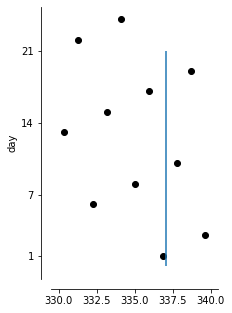

In [6]:
plot_orbits('operations')

Calculations for calval: 140 unique orbits

Earth care at 336.86 on day  1
Earth care at 339.43 on day  3
Earth care at 331.71 on day  6
Earth care at 334.28 on day  8


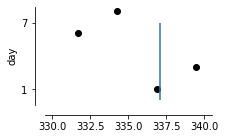

In [7]:
plot_orbits('cal val')